## Sistemas de Recomendación

- Los sistemas de recomendación son sistemas implantados desde hace tiempo en páginas web y plataformas de consumo de productos. 
- El objetivo de estos sistemas es encontrar patrones con comportamientos similares para predecir qué podría gustarle al usuario.


**Algunos ejemplos de los sistemas de recomendación son:**
- Las sugerencias de películas o series en Netflix.
- Libros o artículos en Amazon.
- Recomendaciones de restaurantes de Google.
- Recomendaciones de los buscadores de trabajo.
- Recomendaciones de Amistad en FB o LinkedIn.
- Recomendaciones de noticias en sitios Web de periódicos.


**Ventajas de los Sistemas de recomendación:**
- Los usuarios quedan expuestos a diferentes recomendaciones sobre las que podrían estar interesados. Mejorando su experiencia de compra o consumo de servicio.
- Mejora los servicios del proveedor en atención al cliente. 
- Se encuentran relaciones entre productos no vistos antes. 
- Se identifican patrones de consumo.

## Sistemas de Recomendación: Basado en Filtrado Colaborativo

- Los sistemas de recomendación a través del filtrado colaborativo se basan en las relaciones que existen entre los productos y los intereses de las personas.


- El filtrado colaborativo utiliza dos enfoques: basado en usuario y basado en producto. 


- El filtrado colaborativo enfocado en el usuario, se basa en la similitud entre vecinos usuarios.


- Mientras que el basado en producto, se basa en la similitud entre productos.

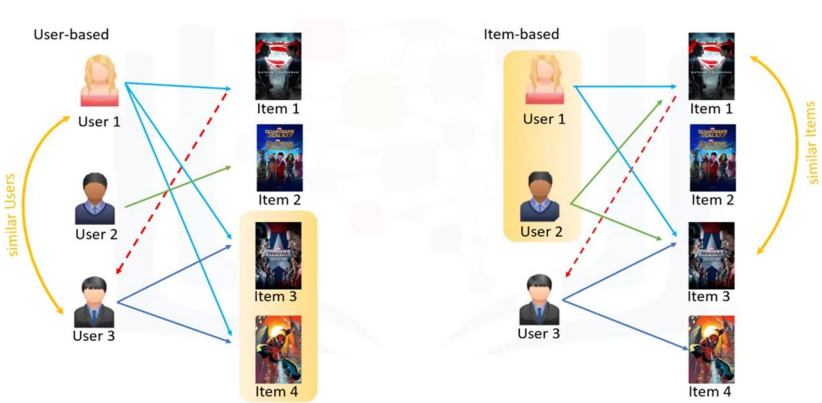

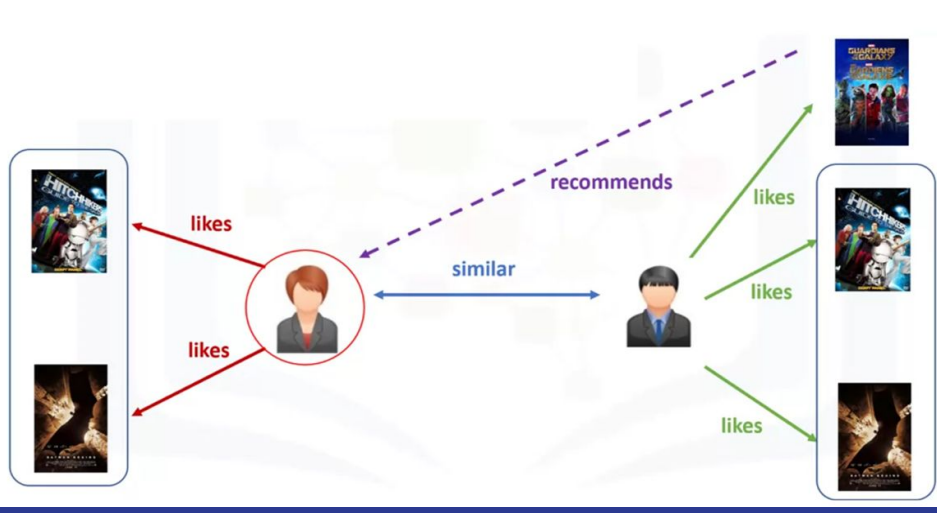

- **El primer paso es descubrir la similitud del "usuario activo" respecto a los demás usuarios.**


- **Esto se puede hacer a través de distintas técnicas de medición como la distancia euclidiana, correlación de Pearson, similitud de coseno, entre otras.**

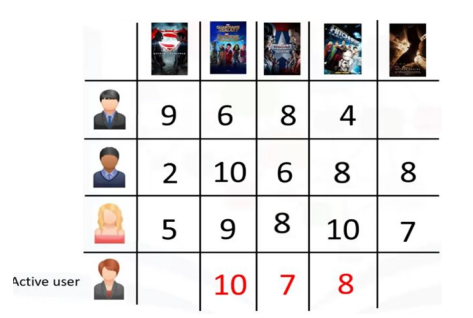

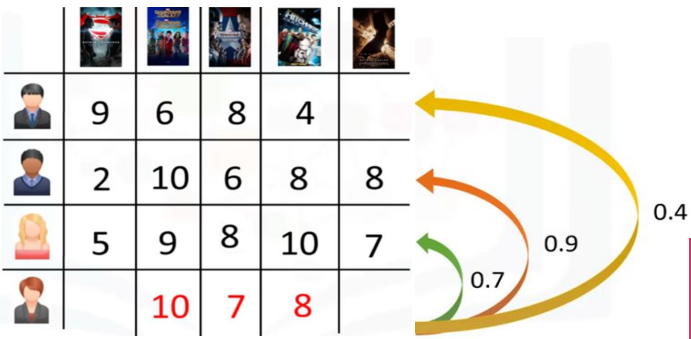

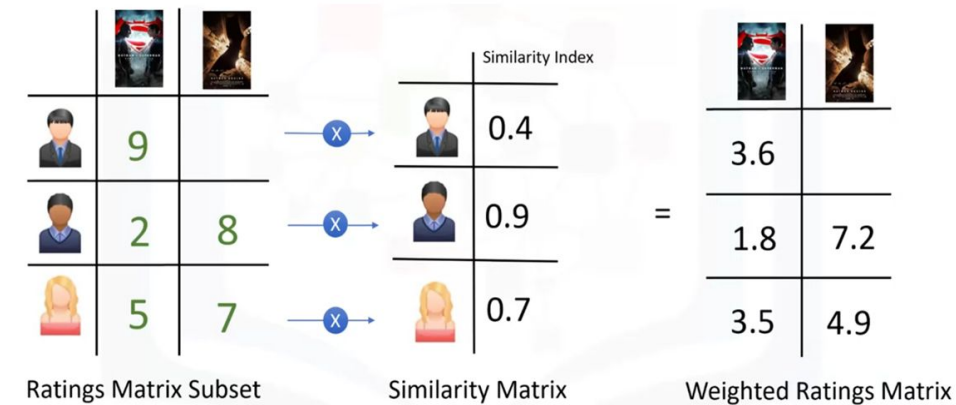

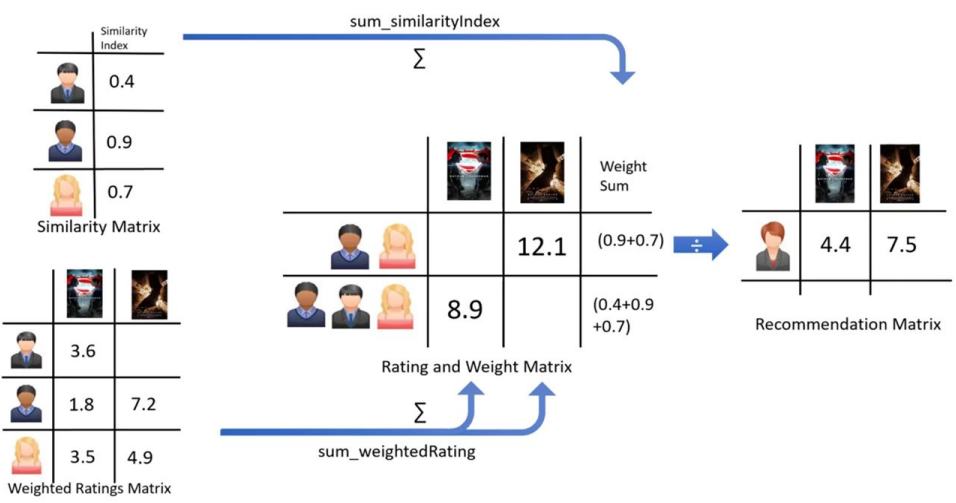

**Conclusiones**:
- El filtrado colaborativo es un sistema de recomendación muy eficaz. Sin embargo, también hay algunos desafíos. 


- Uno de ellos es la escasez de datos. Esta se produce cuando un gran conjunto de usuarios califica solo un número limitado de películas. 


- Debido a lo anterior es posible que no tengamos suficientes clasificaciones en el conjunto de datos por lo que hace imposible proporcionar recomendaciones adecuadas.


- El arranque en frío o inicio en frío, se refiere a la dificultad que tiene el sistema de recomendación, para cuando hay un nuevo usuario y no existe un perfil sobre el cual comparar.


- La escalabilidad también puede convertirse en un problema. A medida que aumenta el número de usuarios o elementos y la cantidad de datos se expande, los algoritmos de filtrado colaborativo comenzarán a sufrir caídas en el rendimiento, simplemente debido al crecimiento y el cálculo de similitud.

**Ejemplo:**

Utilizando el algoritmo de **Recomendador Filtrado Colaborativo**, encuentra la mejor opción a recomendar con el siguiente **`DataFrame`**:

Sabiendo el puntaje de las primeras 3 peliculas de diferentes usuarios, cual de las siguientes 2 es la mejor para recomendar para el usuario activo.

Utiliza la correlación de Pearson para determinar la relación entre usuarios.

In [1]:
import numpy as np
import pandas as pd

# Correlación de Pearson
from scipy.stats import pearsonr

In [2]:
# Correlación de Pearson

x = np.random.randint(0, 10, 10)
y = np.random.randint(5, 15, 10)

pearsonr(x, y)

PearsonRResult(statistic=0.09192918330491993, pvalue=0.8005957611702322)

In [3]:
# Correlación
pearsonr(x, y)[0]

0.09192918330491993

In [100]:
columns = ["Interstellar", "Origen", "Mad Max", "El hombre invisible", "Little Monsters"]

index = ["Usuario 1", "Usuario 2", "Usuario 3", "Usuario Activo"]

data = [[6, 3, 2,      3,     10],
        [4, 7, 5,      9,      8],
        [5, 6, 8,      6,      5],
        [8, 7, 6, np.nan, np.nan]]

df = pd.DataFrame(data = data, columns = columns, index = index)

df

,Interstellar,Origen,Mad Max,El hombre invisible,Little Monsters
Usuario 1,6,3,2,3.0,10.0
Usuario 2,4,7,5,9.0,8.0
Usuario 3,5,6,8,6.0,5.0
Usuario Activo,8,7,6,NaN,NaN


In [108]:
df["corr"] = [round(pearsonr(i, df.dropna(axis = 1).values[-1])[0], 2) for i in df.dropna(axis = 1).values]

df

,Interstellar,Origen,Mad Max,El hombre invisible,Little Monsters,corr
Usuario 1,6,3,2,3.0,10.0,0.96
Usuario 2,4,7,5,9.0,8.0,-0.33
Usuario 3,5,6,8,6.0,5.0,-0.98
Usuario Activo,8,7,6,NaN,NaN,1.00


In [109]:
rating_matrix_subset = df.drop("Usuario Activo").drop(df.dropna(axis = 1).columns, axis = 1)

rating_matrix_subset

,El hombre invisible,Little Monsters
Usuario 1,3.0,10.0
Usuario 2,9.0,8.0
Usuario 3,6.0,5.0


In [110]:
weighted_rating_matrix = (rating_matrix_subset.values.T*df["corr"].values[:-1]).T
weighted_rating_matrix

array([[ 2.88,  9.6 ],
       [-2.97, -2.64],
       [-5.88, -4.9 ]])

In [111]:
weighted_rating_matrix.sum(axis = 0)

array([-5.97,  2.06])

In [112]:
df.reset_index(inplace = True)

In [113]:
df_recom = pd.concat([df, pd.DataFrame(weighted_rating_matrix)], axis = 1).dropna()

df_recom

,index,Interstellar,Origen,Mad Max,El hombre invisible,Little Monsters,corr,0,1
0,Usuario 1,6,3,2,3.0,10.0,0.96,2.88,9.60
1,Usuario 2,4,7,5,9.0,8.0,-0.33,-2.97,-2.64
2,Usuario 3,5,6,8,6.0,5.0,-0.98,-5.88,-4.90


In [114]:
lista_recom = list()
for i in range(2):
    corr_recom = df_recom[df_recom[i] > 0][["corr", i]].sum(axis = 0).to_dict()
    
    lista_recom.append(corr_recom[i]/corr_recom["corr"])
    
    
lista_recom

[3.0, 10.0]

In [115]:
rating_matrix_subset.columns

Index(['El hombre invisible', 'Little Monsters'], dtype='object')

In [116]:
df_recom_matrix = pd.DataFrame(data = np.array([lista_recom, rating_matrix_subset.columns]).T, columns = ["valor", "pelicula"])

df_recom_matrix["valor"] = df_recom_matrix["valor"].astype(float)

df_recom_matrix.sort_values("valor", ascending = False)

,valor,pelicula
1,10.0,Little Monsters
0,3.0,El hombre invisible


## Extra: Repite el ejercicio con otro tipo de correlación.

In [14]:
from scipy.stats import spearmanr

In [15]:
spearmanr(x,y)

SpearmanrResult(correlation=-0.05919261626527134, pvalue=0.8709688800411991)

In [16]:
x

array([7, 5, 9, 0, 6, 9, 9, 2, 0, 7])

In [17]:
y

array([13, 14,  5,  5, 10,  8, 11,  9, 10,  8])

In [26]:
sum([(x[i] - y[i])**2 for i in range(len(x))])

329

In [27]:
distancia = np.sqrt(sum([(x[i] - y[i])**2 for i in range(len(x))]))
distancia

18.138357147217054

In [28]:
x = np.random.randint(0, 10, 10)
y = np.random.randint(5, 15, 10)

In [29]:
distancia = np.sqrt(sum([(x[i] - y[i])**2 for i in range(len(x))]))
distancia

20.493901531919196

## Ejemplo con distancia euclidea

In [117]:
df

,index,Interstellar,Origen,Mad Max,El hombre invisible,Little Monsters,corr
0,Usuario 1,6,3,2,3.0,10.0,0.96
1,Usuario 2,4,7,5,9.0,8.0,-0.33
2,Usuario 3,5,6,8,6.0,5.0,-0.98
3,Usuario Activo,8,7,6,NaN,NaN,1.00


In [118]:
distancias = []

df_filtrado = df[['Interstellar', 'Origen', 'Mad Max']]
df_filtrado

,Interstellar,Origen,Mad Max
0,6,3,2
1,4,7,5
2,5,6,8
3,8,7,6


In [119]:
distancias = []

for i in range(len(df_filtrado)):
    
    temp_list = []
    x = df_filtrado.iloc[i,:].values
    
    for n in range(len(df_filtrado)):
        
        y = df_filtrado.iloc[n,:].values

        distancia = np.sqrt(sum([(x[i] - y[i])**2 for i in range(len(x))]))

        temp_list.append(distancia)
    distancias.append(temp_list)    
distancias

[[0.0, 5.385164807134504, 6.782329983125268, 6.0],
 [5.385164807134504, 0.0, 3.3166247903554, 4.123105625617661],
 [6.782329983125268, 3.3166247903554, 0.0, 3.7416573867739413],
 [6.0, 4.123105625617661, 3.7416573867739413, 0.0]]

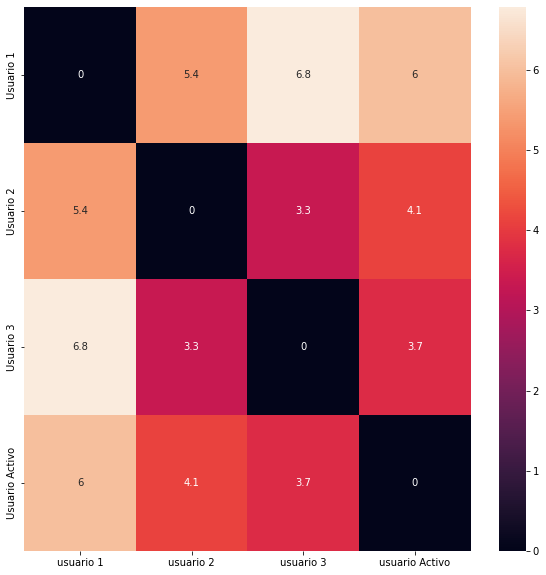

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

df_dist = pd.DataFrame(distancias, columns = ['usuario 1','usuario 2','usuario 3','usuario Activo'], index = ['Usuario 1','Usuario 2','Usuario 3','Usuario Activo'] )

plt.figure(figsize=(10,10))
sns.heatmap(df_dist, annot=True);

In [121]:
df_dist.reset_index(inplace=True)

In [122]:
df_dist

,index,usuario 1,usuario 2,usuario 3,usuario Activo
0,Usuario 1,0.000000,5.385165,6.782330,6.000000
1,Usuario 2,5.385165,0.000000,3.316625,4.123106
2,Usuario 3,6.782330,3.316625,0.000000,3.741657
3,Usuario Activo,6.000000,4.123106,3.741657,0.000000


In [123]:
df = pd.merge(left=df, right=df_dist, on='index', how='left')
df

,index,Interstellar,Origen,Mad Max,El hombre invisible,Little Monsters,corr,usuario 1,usuario 2,usuario 3,usuario Activo
0,Usuario 1,6,3,2,3.0,10.0,0.96,0.000000,5.385165,6.782330,6.000000
1,Usuario 2,4,7,5,9.0,8.0,-0.33,5.385165,0.000000,3.316625,4.123106
2,Usuario 3,5,6,8,6.0,5.0,-0.98,6.782330,3.316625,0.000000,3.741657
3,Usuario Activo,8,7,6,NaN,NaN,1.00,6.000000,4.123106,3.741657,0.000000


In [124]:
df['El hombre invisible_rate_usuario_activo'] = df['El hombre invisible'] * df['usuario Activo']
df['Little Monsters_rate_usuario_activo'] = df['Little Monsters'] * df['usuario Activo']
df

,index,Interstellar,Origen,Mad Max,El hombre invisible,Little Monsters,corr,usuario 1,usuario 2,usuario 3,usuario Activo,El hombre invisible_rate_usuario_activo,Little Monsters_rate_usuario_activo
0,Usuario 1,6,3,2,3.0,10.0,0.96,0.000000,5.385165,6.782330,6.000000,18.000000,60.000000
1,Usuario 2,4,7,5,9.0,8.0,-0.33,5.385165,0.000000,3.316625,4.123106,37.107951,32.984845
2,Usuario 3,5,6,8,6.0,5.0,-0.98,6.782330,3.316625,0.000000,3.741657,22.449944,18.708287
3,Usuario Activo,8,7,6,NaN,NaN,1.00,6.000000,4.123106,3.741657,0.000000,NaN,NaN


In [125]:
df['El hombre invisible_rate_usuario_activo'] = df['El hombre invisible_rate_usuario_activo'].fillna(df['El hombre invisible_rate_usuario_activo'].min())
df['Little Monsters_rate_usuario_activo'] = df['Little Monsters_rate_usuario_activo'].fillna(df['Little Monsters_rate_usuario_activo'].min())
df

,index,Interstellar,Origen,Mad Max,El hombre invisible,Little Monsters,corr,usuario 1,usuario 2,usuario 3,usuario Activo,El hombre invisible_rate_usuario_activo,Little Monsters_rate_usuario_activo
0,Usuario 1,6,3,2,3.0,10.0,0.96,0.000000,5.385165,6.782330,6.000000,18.000000,60.000000
1,Usuario 2,4,7,5,9.0,8.0,-0.33,5.385165,0.000000,3.316625,4.123106,37.107951,32.984845
2,Usuario 3,5,6,8,6.0,5.0,-0.98,6.782330,3.316625,0.000000,3.741657,22.449944,18.708287
3,Usuario Activo,8,7,6,NaN,NaN,1.00,6.000000,4.123106,3.741657,0.000000,18.000000,18.708287


In [126]:
df[3:][["El hombre invisible_rate_usuario_activo","Little Monsters_rate_usuario_activo"]].T.sort_values(3, ascending=False).reset_index()

,index,3
0,Little Monsters_rate_usuario_activo,18.708287
1,El hombre invisible_rate_usuario_activo,18.000000


In [127]:
cols = [c for c in df.columns if 'usuario' not in c.lower() and 'index' not in c and 'corr' not in c]
cols

['Interstellar', 'Origen', 'Mad Max', 'El hombre invisible', 'Little Monsters']

In [128]:
df['mean_eval'] = df[cols].mean(axis=1)
df

,index,Interstellar,Origen,Mad Max,El hombre invisible,Little Monsters,corr,usuario 1,usuario 2,usuario 3,usuario Activo,El hombre invisible_rate_usuario_activo,Little Monsters_rate_usuario_activo,mean_eval
0,Usuario 1,6,3,2,3.0,10.0,0.96,0.000000,5.385165,6.782330,6.000000,18.000000,60.000000,4.8
1,Usuario 2,4,7,5,9.0,8.0,-0.33,5.385165,0.000000,3.316625,4.123106,37.107951,32.984845,6.6
2,Usuario 3,5,6,8,6.0,5.0,-0.98,6.782330,3.316625,0.000000,3.741657,22.449944,18.708287,6.0
3,Usuario Activo,8,7,6,NaN,NaN,1.00,6.000000,4.123106,3.741657,0.000000,18.000000,18.708287,7.0
